---
title: "Data Cleaning"
format: 
    html:
        code-fold: true

---

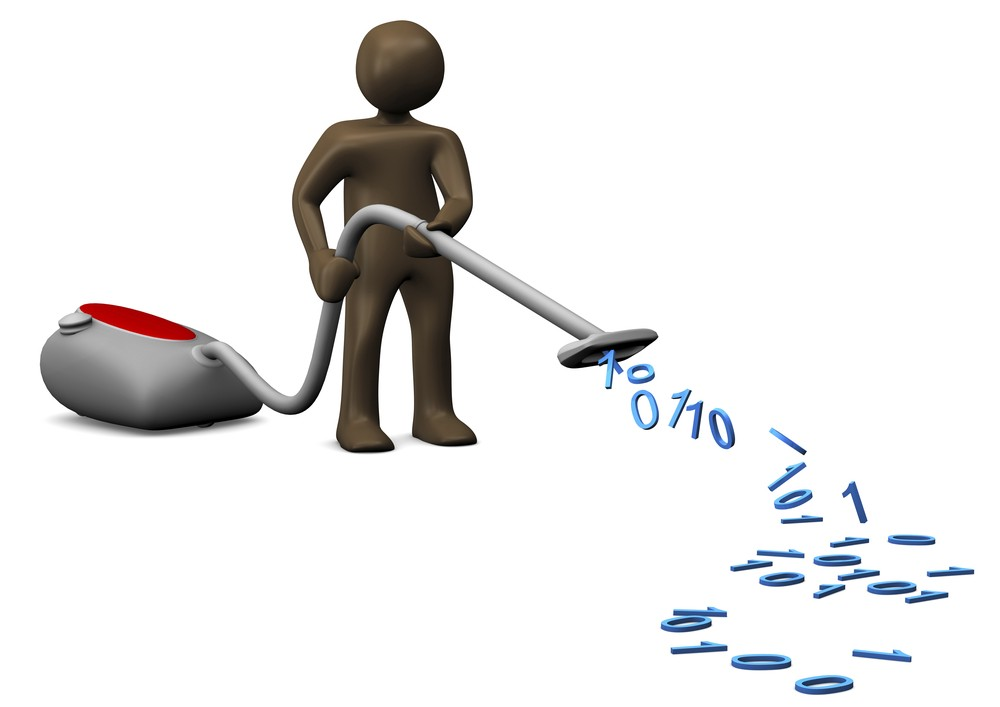

In [3]:
from IPython import display
display.Image("../images/data_cleaning.jpeg")

## Part 1 Twitter API in python
The consumers' review is an important part of WEmedia development and it indicates the attitude of consumers' attitude about the social media platforms and big data environment. From my project, I plan to use twitter API to scratch thousands of tweets from several keywords. Since I have gathered the tweets contained keywords like "'media','internet_influencer','data','consumer privacy'. I will do some data cleaning and data preprocess about this dataset. 

 First of all, I would like to detect whether there are some NA values in the datasets. 
 
 Then Since there are a lot of useless puntuations, urls, commas, numbers, highercase, etc will affect our results of frequencies, I decided to remove them all by using pipeline in spacy in order to remove stopwords. Through this steps, the datasets are got rid from many common words which are no use for our future calculation and the results gathering. 
 
 Moreover, I would like to detect the frequency of words and gain a wordcloud plot. I will use countVectorizer to generate a bag of words and count frequency for the tweets I gained. 

 More than this, since sentiment analysis is also an important part to analyze the consumes' review. Then I will use nltk package to calculate the sentiment scores for each tweets in order to utilize this dataset to build future classification model and get a prediction model for more data.

In [4]:
##### Import required packages

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import svm
import nltk
import warnings
warnings.filterwarnings('ignore')

##### Load the required dataset

In [7]:
pytt = pd.read_csv("../data/00-raw-data/twitterpython.csv")
pytt.head()

,Unnamed: 0,edit_history_tweet_ids,lang,created_at,text,id,author_id
0,0,['1597702943347728385'],en,2022-11-29T21:24:00.000Z,A more memorable connection is one that respec...,1597702943347728385,17470121
1,1,['1597702691781746690'],en,2022-11-29T21:23:00.000Z,A more memorable connection is one that respec...,1597702691781746690,17470121
2,2,['1597701197108228096'],en,2022-11-29T21:17:03.000Z,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,1597701197108228096,1518769827560665089
3,3,['1597700541911822339'],en,2022-11-29T21:14:27.000Z,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,1597700541911822339,15720875
4,4,['1597689648696143872'],en,2022-11-29T20:31:10.000Z,@DanKnightMMA Dear Dan - you seem like an enga...,1597689648696143872,39512124


##### Find the dataset has the NA value or not
NA value can be messy data points that interrupt our results. 
Fortunately, As we can see below, there is no NA values in this dataset.

In [8]:
pytt.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Unnamed: 0  edit_history_tweet_ids   lang  created_at   text     id  \
0          False                   False  False       False  False  False   
1          False                   False  False       False  False  False   
2          False                   False  False       False  False  False   
3          False                   False  False       False  False  False   
4          False                   False  False       False  False  False   
...          ...                     ...    ...         ...    ...    ...   
1295       False                   False  False       False  False  False   
1296       False                   False  False       False  False  False   
1297       False                   False  False       False  False  False   
1298       False                   False  False       False  False  False   
1299       False                   False  False       False  False  False   

      author_

##### spacy pipeline 
Use spacy pipeline as I learned in ANLY580 to do text normalization and text preprocessing

When you process data with natural language processing, spacy first tokenizes the text to generate a Doc object. The document is then processed in several different steps - this is also known as the processing pipeline. The figure below describes how spacy implements effective word processing



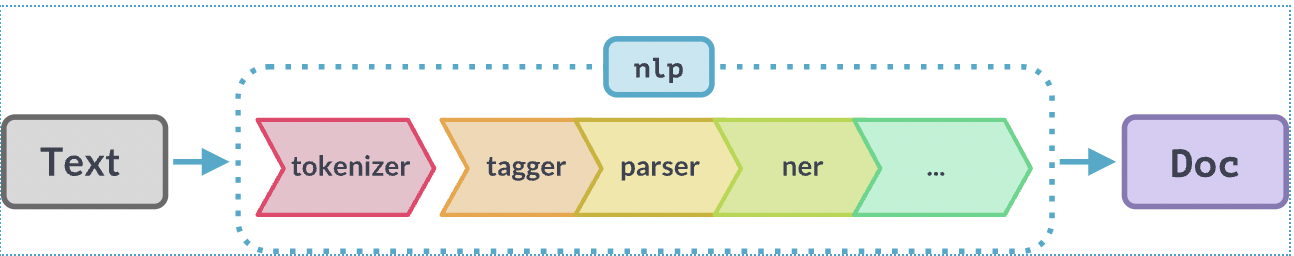

In [9]:
from IPython import display
display.Image("../images/spacy.png")

Since there are a lot of useless puntuations, urls, commas, numbers, highercase, etc will affect our results of frequencies, I decided to remove them all by using pipeline in spacy.

In [10]:
import re
import spacy
from spacy.language import Language


pipeline = spacy.load('en_core_web_sm')

# http://emailregex.com/
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "number"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "), # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

twitter_sentences = []
for i, d in enumerate(pytt['text']):
    for repl in replace:
        d = re.sub(repl[0], repl[1], d)
    twitter_sentences.append(d)


@Language.component("pyttPreprocessor")
def ng20_preprocess(doc):
    tokens = [token for token in doc 
              if not any((token.is_stop, token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    tokens = [token for token in tokens if token]
    return " ".join(tokens)


pipeline.add_pipe("pyttPreprocessor")

<function __main__.ng20_preprocess(doc)>

##### Pass data through spacy pipeline

In [11]:
docs = []
for sent in twitter_sentences:
    docs.append(pipeline(sent))
tweetresult = pd.DataFrame(docs)
tweetresult.head()

,0
0,memorable connection respect consumer privacy ...
1,memorable connection respect consumer privacy ...
2,rt okeymornumber jay_scherrer muskqunumberte e...
3,jay_scherrer muskqunumberte elonmusk elon musk...
4,danknightmma dear dan like engage canadian rea...


##### Export this dataset to csv


In [12]:
tweetresult.to_csv("../data/01-modified-data/tweetresult.csv")

##### Generate BOW and count the word frequencies

I want to learn about through these keywords, what kind of problems platform users discuss more in their daily lives, so I used the bag of words I generated to count the frequencies of each word appears by using CountVectorizer and set a dataframe which contains texts and counts. Then I sort the table with descending order to see the result more clearly. 

In [13]:
countvectorizer = CountVectorizer()
ttbow = countvectorizer.fit(docs)
features = ttbow.vocabulary_.keys()
counts = ttbow.vocabulary_.values()
ttbow=pd.DataFrame({'words':features,'counts':counts})
ttbow = ttbow.sort_values(by=['counts'],ascending=False)

According to this dataframe, 


words: name of the count words


counts: frequencies that each word appears

In [14]:
ttbow

,words,counts
52,zfnumberifvzdbnumber,616
519,zero,615
546,year,614
344,xpipnumberunumbergm,613
366,wsbchairman,612
...,...,...
84,action,4
57,act,3
536,achieve,2
392,access,1


##### Export dataframe to csv file for further use

In [15]:
ttbow.to_csv("../data/01-modified-data/wordfreqpython.csv")

##### Sentiment analysis
Sentiment Analysis, also known as opinion mining, is one of the natural language processing methods that can be used to identify the emotional tone behind the body of text. It is a useful tool for identifying and categorizing opinions about products, services, or ideas.

Sentiment analysis for this part of data cleaning is very important. The sentimentintensityanalyzer can automatically helps me to calculate the score of a text is positive, neutral, negative or compound. I used for loop to calculate text by text and then I get a whole dictionary. Then I trasnferred dictionary to dataframe and split sentiment scores into three columns for the future visualization. Finally, I combine text and sentiment scores together to see the result clearly. 

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
def getSentiments(df):
    sid = SentimentIntensityAnalyzer()
    tweet_str = ""
    tweetscore = []
    for tweet in df['text']:
        tweet_str = tweet_str + " " + tweet
        score = sid.polarity_scores(tweet_str)
        tweetscore.append(score)
    return tweetscore

##### Create a dataframe for sentiment analysis as tweets score

According to this dataframe,


text: each tweet which I collected


neg: negative sentiment score


neutral: neural sentiment score


pos: positive sentiment score


compound: the overall scores

In [17]:
sentiment = getSentiments(pytt)
texts = pd.DataFrame(pytt.text)
sentimentscore = pd.DataFrame.from_dict(sentiment)
sentimentscore.head()

,neg,neu,pos,compound
0,0.000,0.846,0.154,0.4588
1,0.000,0.846,0.154,0.7184
2,0.081,0.796,0.123,0.0846
3,0.102,0.766,0.132,-0.0881
4,0.081,0.769,0.151,0.6461


In [19]:
tweetscore = pd.concat([texts,sentimentscore],axis=1)
tweetscore.head()

,text,neg,neu,pos,compound
0,A more memorable connection is one that respec...,0.000,0.846,0.154,0.4588
1,A more memorable connection is one that respec...,0.000,0.846,0.154,0.7184
2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,0.081,0.796,0.123,0.0846
3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,0.102,0.766,0.132,-0.0881
4,@DanKnightMMA Dear Dan - you seem like an enga...,0.081,0.769,0.151,0.6461


##### Export dataframe to csv file for further use

In [25]:
tweetscore.to_csv("../data/01-modified-data/pytweetscore.csv")

More than this, I would like to define each tweet is negative, neural, positive with compound score in order to the further explorations of users' attitude. At this time, I plan to first, make a definition code to define one sentence is positive, negative or neutural. Then I will use a for loop to bring each sentence a classification and store it in a dataframe.

In [21]:
def predict_sentiment(sentence):
  '''Function to predict sentiment of a sentence'''
    
  sid = SentimentIntensityAnalyzer()
  sentiment_dict = sid.polarity_scores(sentence)

  # decide sentiment as positive, negative and neutral 
  if sentiment_dict['compound'] >= 0.05 : 
      return ("Positive", round(sentiment_dict['pos']*100, 2))

  elif sentiment_dict['compound'] <= - 0.05 : 
      return ("Negative", round(sentiment_dict['neg']*100, 2))

  else : 
      return ("Neutral", round(sentiment_dict['neu']*100, 2))

In [22]:
result = [] 
for i in pytt.text:
    result.append(predict_sentiment(i))

Convert dictionary to dataframe and combine this result with text dataframe. At that time, rename the column name in order to make the dataframe easier to understand.

In [23]:
sentimentresult = pd.DataFrame.from_dict(result)
tweetresult = pd.concat([texts,sentimentresult],axis=1)

tweetresult.rename(columns={0:'result'},inplace=True)
tweetresult.rename(columns={1:'scores'},inplace=True)

In [24]:
tweetresult.head()

,text,result,scores
0,A more memorable connection is one that respec...,Positive,15.4
1,A more memorable connection is one that respec...,Positive,15.4
2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,Negative,24.2
3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,Negative,14.0
4,@DanKnightMMA Dear Dan - you seem like an enga...,Positive,26.0


##### Export the dataframe to csv file

In [26]:
tweetresult.to_csv("../data/01-modified-data/pytweetresult.csv")

## Part 2 Modified data

Instagram is one of the most popular and famous platforms for users to network, post their daily lives. There are a lot of famous internet influencers here. Instagram is also one of the important parts for wemedia to develop. Users can create channels to post their daily lives, show their abilities, post some fun videos in order to attract more fans. Ad sellers also analyze their business value to contact instagram influencers to promote their products in order to gain more benefits. 

In this dataset, it clearly shows followers'number, average likes each post, country etc. I would like to use this dataset to deeper analyze the trend of internet influencers followers. Country distribution of these influencers. More than this, I would like to use other datasets to locate the fields which these inernet influencers focus to further analyze factors of these internet influencers. What makes them success. 

channel info: Username in instagram

influence score: It is calculated based on their popularity.

posts: total posts they have

followers: total followers they have

avg_likes: average likes of their total posts

60_days_eng_rate: 60 days of engagement rate

new_post_avg_like: a calculation of the average likes they gained from new posts. 

total_likes: total likes of their posts in instagram.

country: users' origin. What countries they from?

##### Import required packages

In [1]:
library(tidyverse)
library(dplyr)
library(reshape2)
library(tidyr)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




##### Load the required dataset

In [2]:
instagram_infl = read.csv("../data/00-raw-data/top_insta_influencers_data.csv")
head(instagram_infl)

,rank,channel_info,influence_score,posts,followers,avg_likes,X60_day_eng_rate,new_post_avg_like,total_likes,country
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,
4,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
6,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States


##### Get rid of some NA values
At first, I notified there are some NA values in the column country, Because I need to use these columns, so I don't want to drop these values. I decided to change NA values to undefined to explain that these influencers have not defined country. 

In [3]:
instagram_infl$country[instagram_infl$country==""] <- "Undefined"
head(instagram_infl)

,rank,channel_info,influence_score,posts,followers,avg_likes,X60_day_eng_rate,new_post_avg_like,total_likes,country
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
2,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,Undefined
4,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
5,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
6,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States


As we noticed, the avg_likes column contains different unit, I want to expand it as the numeric instead of character in order to do the further visualization and comparison. 

In [4]:

instagram_infl$avg_likes1 <- str_extract(instagram_infl$avg_likes, "\\d+\\.?\\d*") #extract number without units
instagram_infl$avg_likes1unit <- str_sub(instagram_infl$avg_likes,-1) #extract units since units are last words
instagram_infl$avg_likes1 <- as.numeric(instagram_infl$avg_likes1) #change the new column datatype as num
instagram_infl$avg_likes1 <- ifelse(instagram_infl$avg_likes1unit == 'm', instagram_infl$avg_likes1*1000000, instagram_infl$avg_likes1*1000)
#Since the unit is different, I used the ifelse function to do the further calculation
instagram_infl <- select(instagram_infl,-c(avg_likes,avg_likes1unit))#Drop useless columns
names(instagram_infl)[names(instagram_infl)=='avg_likes1'] <- 'avg_likes'#rename columns
head(instagram_infl)

,rank,channel_info,influence_score,posts,followers,X60_day_eng_rate,new_post_avg_like,total_likes,country,avg_likes
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,cristiano,92,3.3k,475.8m,1.39%,6.5m,29.0b,Spain,8700000
2,2,kyliejenner,91,6.9k,366.2m,1.62%,5.9m,57.4b,United States,8300000
3,3,leomessi,90,0.89k,357.3m,1.24%,4.4m,6.0b,Undefined,6800000
4,4,selenagomez,93,1.8k,342.7m,0.97%,3.3m,11.5b,United States,6200000
5,5,therock,91,6.8k,334.1m,0.20%,665.3k,12.5b,United States,1900000
6,6,kimkardashian,91,5.6k,329.2m,0.88%,2.9m,19.9b,United States,3500000


##### Change column names
At that time, I used summary and want to know the median, mean, etc values of each numeric number, then I noticed that other columns like posts also cannot convert to numeric since the cells in the column have units. As a result, I decided to get rid of units in each columns and change the column type into numeric

In [5]:
print(summary(instagram_infl))

      rank        channel_info       influence_score    posts          
 Min.   :  1.00   Length:200         Min.   :22.00   Length:200        
 1st Qu.: 50.75   Class :character   1st Qu.:80.00   Class :character  
 Median :100.50   Mode  :character   Median :84.00   Mode  :character  
 Mean   :100.50                      Mean   :81.82                     
 3rd Qu.:150.25                      3rd Qu.:86.00                     
 Max.   :200.00                      Max.   :93.00                     
  followers         X60_day_eng_rate   new_post_avg_like  total_likes       
 Length:200         Length:200         Length:200         Length:200        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

In [6]:
instagram_infl$posts = substr(instagram_infl$posts,1,nchar(instagram_infl$posts)-1)
instagram_infl$posts = as.numeric(instagram_infl$posts)
names(instagram_infl)[names(instagram_infl)=='posts'] <- 'posts(k)'
instagram_infl$followers = substr(instagram_infl$followers,1,nchar(instagram_infl$followers)-1)
instagram_infl$followers = as.numeric(instagram_infl$followers)
names(instagram_infl)[names(instagram_infl)=='followers'] <- 'followers(m)'
instagram_infl$X60_day_eng_rate = substr(instagram_infl$X60_day_eng_rate,1,nchar(instagram_infl$X60_day_eng_rate)-1)
instagram_infl$X60_day_eng_rate = as.numeric(instagram_infl$X60_day_eng_rate)
names(instagram_infl)[names(instagram_infl)=='X60_day_eng_rate'] <- 'X60_day_eng_rate(%)'
instagram_infl$new_post_avg_like = substr(instagram_infl$new_post_avg_like,1,nchar(instagram_infl$new_post_avg_like)-1)
instagram_infl$new_post_avg_like = as.numeric(instagram_infl$new_post_avg_like)
names(instagram_infl)[names(instagram_infl)=='new_post_avg_like'] <- 'new_post_avg_like(m)'
instagram_infl$total_likes = substr(instagram_infl$total_likes,1,nchar(instagram_infl$total_likes)-1)
instagram_infl$total_likes = as.numeric(instagram_infl$total_likes)
names(instagram_infl)[names(instagram_infl)=='total_likes'] <- 'total_likes(b)'
head(instagram_infl)

,rank,channel_info,influence_score,posts(k),followers(m),X60_day_eng_rate(%),new_post_avg_like(m),total_likes(b),country,avg_likes
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,cristiano,92,3.30,475.8,1.39,6.5,29.0,Spain,8700000
2,2,kyliejenner,91,6.90,366.2,1.62,5.9,57.4,United States,8300000
3,3,leomessi,90,0.89,357.3,1.24,4.4,6.0,Undefined,6800000
4,4,selenagomez,93,1.80,342.7,0.97,3.3,11.5,United States,6200000
5,5,therock,91,6.80,334.1,0.20,665.3,12.5,United States,1900000
6,6,kimkardashian,91,5.60,329.2,0.88,2.9,19.9,United States,3500000


In [7]:
summary(instagram_infl)

      rank        channel_info       influence_score    posts(k)      
 Min.   :  1.00   Length:200         Min.   :22.00   Min.   : 0.0100  
 1st Qu.: 50.75   Class :character   1st Qu.:80.00   1st Qu.: 0.9475  
 Median :100.50   Mode  :character   Median :84.00   Median : 2.1000  
 Mean   :100.50                      Mean   :81.82   Mean   : 3.4998  
 3rd Qu.:150.25                      3rd Qu.:86.00   3rd Qu.: 5.0250  
 Max.   :200.00                      Max.   :93.00   Max.   :17.5000  
                                                                      
  followers(m)    X60_day_eng_rate(%) new_post_avg_like(m) total_likes(b)  
 Min.   : 32.80   Min.   : 0.010      Min.   :  1.0        Min.   :  1.00  
 1st Qu.: 40.00   1st Qu.: 0.410      1st Qu.:  4.4        1st Qu.:  2.00  
 Median : 50.05   Median : 0.880      Median :149.3        Median :  4.00  
 Mean   : 77.41   Mean   : 1.902      Mean   :247.0        Mean   :142.13  
 3rd Qu.: 68.90   3rd Qu.: 2.035      3rd Qu.:412.3 

##### Take a glimpse of final cleaned dataset
Now the dataset is much clean now and it is easy for further calculation. Now we can export dataframe as csv files now.

In [8]:
head(instagram_infl)

,rank,channel_info,influence_score,posts(k),followers(m),X60_day_eng_rate(%),new_post_avg_like(m),total_likes(b),country,avg_likes
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,cristiano,92,3.30,475.8,1.39,6.5,29.0,Spain,8700000
2,2,kyliejenner,91,6.90,366.2,1.62,5.9,57.4,United States,8300000
3,3,leomessi,90,0.89,357.3,1.24,4.4,6.0,Undefined,6800000
4,4,selenagomez,93,1.80,342.7,0.97,3.3,11.5,United States,6200000
5,5,therock,91,6.80,334.1,0.20,665.3,12.5,United States,1900000
6,6,kimkardashian,91,5.60,329.2,0.88,2.9,19.9,United States,3500000


##### Export the dataset to csv

In [9]:
write.csv(instagram_infl,"../data/01-modified-data/instagram_infl.csv")

## Part 3 Twitter API in R

For R API, I used twitter API to scratch keywords like "instagram, tiktok, youtube, facebook" to scratch users' attitudes about these platforms. 

##### Import required packages

In [10]:
library(selectr)
library(rvest)
library(xml2)
library(wordcloud2) # for generating really cool looking wordclouds
library(tm) # for text minning
library(dplyr) # loads of fun stuff including piping
library(ROAuth)
library(jsonlite)
library(httpuv)
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
suppressWarnings(expr)#ignore warning
options(warn=-1)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Loading required package: RColorBrewer



function (expr) 
{
    enexpr(expr)
}
<bytecode: 0x7fa1df1d3df0>
<environment: namespace:rlang>

##### Load the required dataset

In [12]:
TweetsDF <- read.csv("../data/00-raw-data/tweetinr.csv")

##### Do text transformation for the dataframe
Take a glimpse of the dataframe, there is a lot of punctuation that is totally not useful for me to count the future frequency. As a result, I used corpus() to normalizing and tokenizing the dataset, then I use tm_map to remove punctuations like "/","@",etc. More than this, because there are a lot of urls, numbers, white space, and highercase in the text. I decided to remove them all because they will afffect my results. So I cleaned the data as below:

In [13]:
FName = "~/Desktop/wemediaexample.txt"
MyFile <- file(FName)
cat(unlist(TweetsDF), " ", file=MyFile, sep="\n")
close(MyFile)

In [14]:
twittertext = Corpus(VectorSource(TweetsDF$text))
toSpace = content_transformer(
              function (x, pattern)
              gsub(pattern, " ", x))
twittertext1 = tm_map(twittertext, toSpace, "/")
twittertext1 = tm_map(twittertext, toSpace, "@")
twittertext1 = tm_map(twittertext, toSpace, "#")
twittertext1 = tm_map(twittertext1, content_transformer(tolower))
twittertext1 = tm_map(twittertext1, removeNumbers)
twittertext1 = tm_map(twittertext1, stripWhitespace)
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
twittertext1 = tm_map(twittertext, removeURL)
head(twittertext1)


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 6

##### Calculate the frequencies of words
Since I need the results to compare the popularity among each platforms, the frequencies of words will help me to understand which platforms are discussed more among twitter. As a result, I used termdocumentmatrix() to calculate the frequecies each word appears. Then I sort the table in the descending order to see the frequencies more straightforward.

According to this dataframe, 


word: name of the count words


freq: frequencies that each word appears

In [15]:
twittertm = TermDocumentMatrix(twittertext1)
m = as.matrix(twittertm)
v = sort(rowSums(m), 
         decreasing = TRUE)
d = data.frame(word = names(v),
               freq = v)
head(d, 10)

,word,freq
,<chr>,<dbl>
tik,tik,166
tok,tok,162
and,and,140
brand,brand,90
she,she,90
wearing,wearing,90
posted,posted,88
viral,viral,88
://t.co/xiuittpwgv,://t.co/xiuittpwgv,87


##### Export the dataframe to csv

In [16]:
write.csv(d,"../data/01-modified-data/twittertm.csv")

##### Reference
Contributor, T. T. (2021, October 15). What is sentiment analysis (opinion mining)? definition from Searchbusinessanalytics. SearchBusinessAnalytics. Retrieved November 29, 2022, from https://www.techtarget.com/searchbusinessanalytics/definition/opinion-mining-sentiment-mining 

Language Processing Pipelines · spacy usage documentation. Language Processing Pipelines. (n.d.). Retrieved November 29, 2022, from https://spacy.io/usage/processing-pipelines 